The solution to freestreaming of a massless gas in n-dim. for the gaussian initial condition is given here: https://link.springer.com/content/pdf/10.1140%2Fepjc%2Fs10052-018-6112-6.pdf


Eqn. 26 gives the solution to the components of stress Tensor $T^{\mu\nu}(x)$ at a later time, given a gaussian initial condition for the initial energy density. 

For our test, we set the initial normalization of energy density $e_0 = 500$ fm^-4, and the width $\sigma = 1$ fm, and the location of the peak $x_0 = 0$. 

The analytic solution: $T^{00} = e_0 * \exp(-\frac{\vec{x}^2 + t^2}{2\sigma^2})\frac{\sinh(a)}{a}$, where $a = \frac{t|\vec{x}|}{\sigma^2}$

Our initial profile (t = 0.0):

In [9]:
import math
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [15, 10]
plt.rcParams['lines.linewidth'] = 3
matplotlib.rcParams.update({'font.size': 22})

In [10]:
nx = 101 # number of points in x
dx = 0.1 # setp size in x 
xmax = (nx - 1) / 2 * dx
xmin = -xmax
xy_block_size = nx * nx
ctr = int( (nx - 1) / 2 ) # index of center point of grid
xvals = np.arange(xmin, xmax + dx, dx)

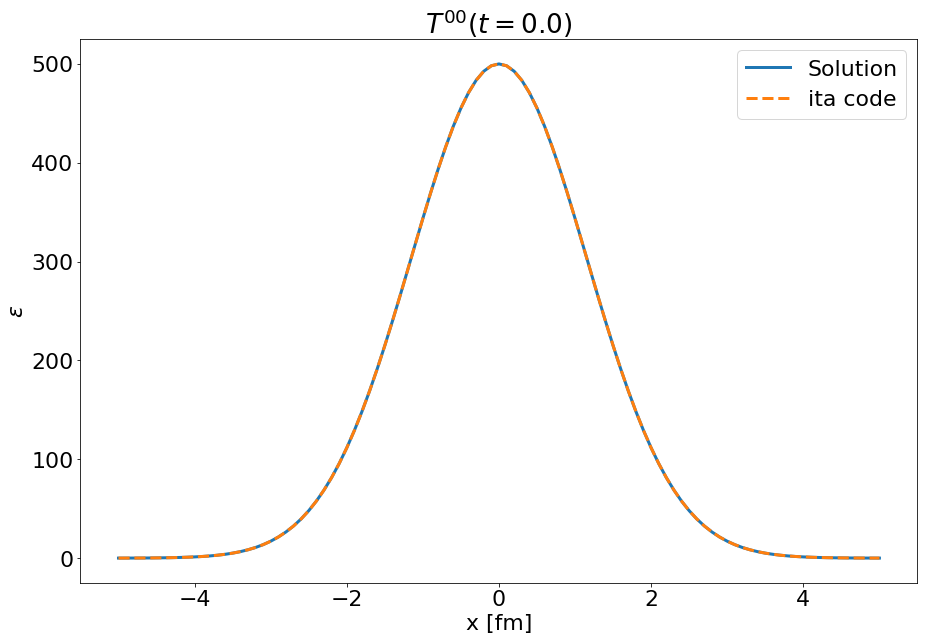

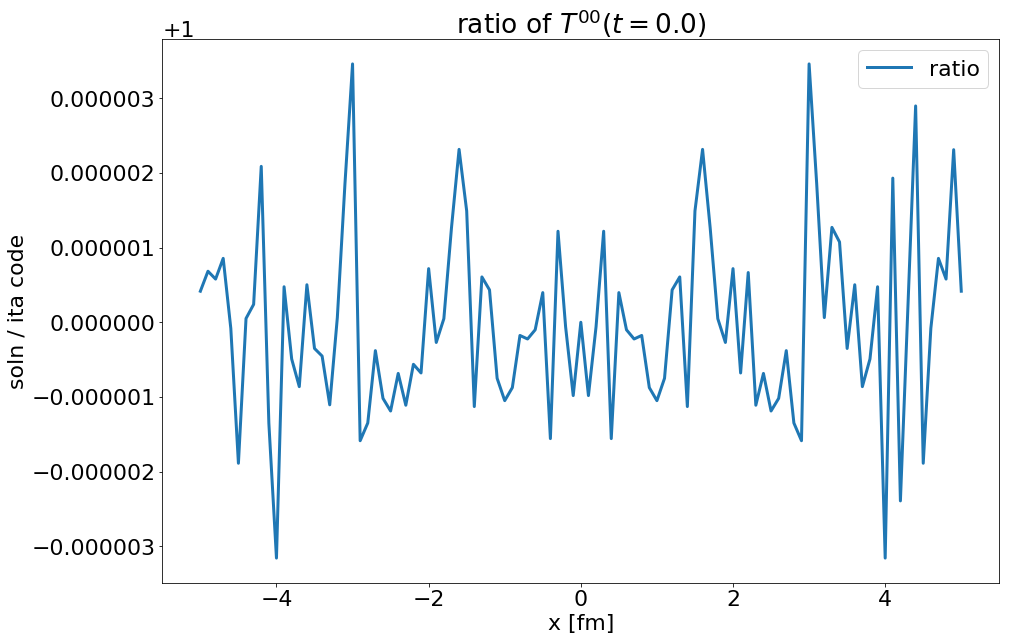

In [11]:
e0 = 500.0 #initial normalization
b = 1.0 #initial width of gaussian

dt = 0.0 #time difference
soln = []
for x in xvals:
    result = e0 * math.exp( -3.0*(x*x + dt*dt)/ (8.0*b*b) )
    soln.append(result)
    
T00 = np.loadtxt('output/T00_projection_0.000.dat')
T00_x = T00[ctr][:]

plt.plot(xvals, soln, label='Solution')
plt.plot(xvals, T00_x, '--', label='ita code')
plt.title(r"$T^{00} (t = 0.0)$")
plt.xlabel("x [fm]")
plt.ylabel(r"$\epsilon$")
plt.legend()
plt.show()

ratio = soln / T00_x
plt.plot(xvals, ratio, label='ratio')
plt.title(r"ratio of $T^{00} (t = 0.0)$")
plt.xlabel("x [fm]")
plt.ylabel(r"soln / ita code")
#plt.ylim(1.0082, 1.0084)
plt.legend()
plt.show()

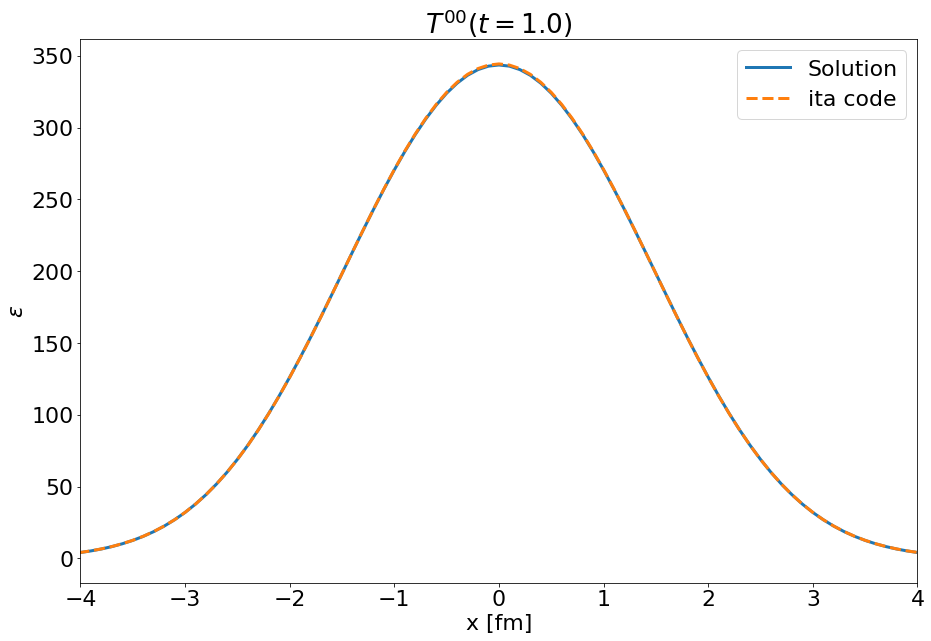

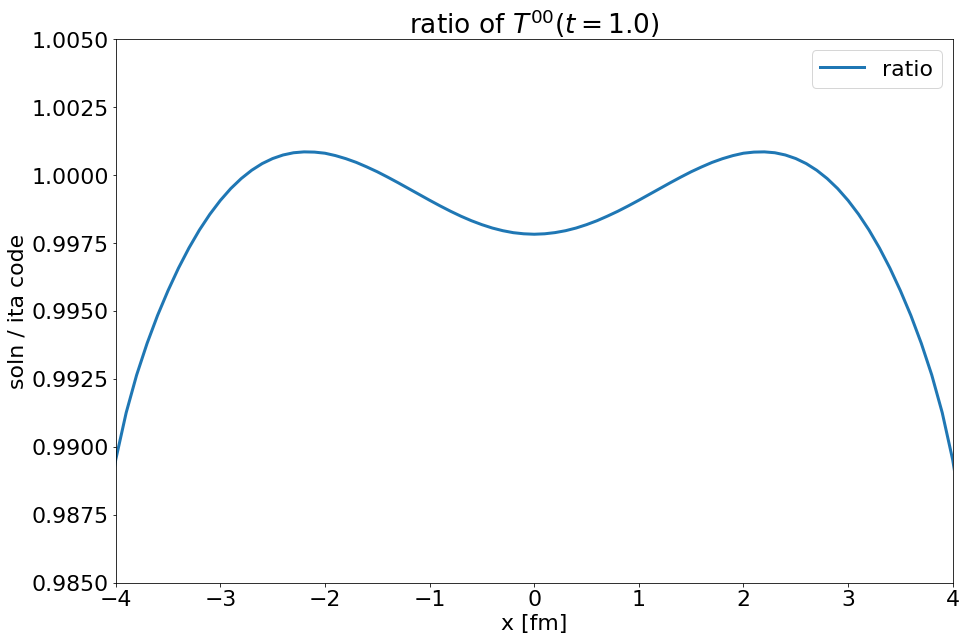

In [14]:
dt = 1.0 #time difference
soln = []
for x in xvals:
    a = dt * abs(x) / (b * b)
    result = e0 * math.exp( -3.0*(x*x + dt*dt)/ (8.0*b*b) ) * np.i0( (-3.0*x*dt) / (4.0*b*b) )
    soln.append(result)

T00 = np.loadtxt('output/T00_projection_1.000.dat')
T00_x = T00[ctr][:]

plt.plot(xvals, soln, label='Solution')
plt.plot(xvals, T00_x, '--', label='ita code')
plt.title(r"$T^{00} (t = 1.0)$")
plt.xlabel("x [fm]")
plt.ylabel(r"$\epsilon$")
plt.legend()
plt.xlim(-4,4)
plt.show()

ratio = soln / T00_x
plt.plot(xvals, ratio, label='ratio')
plt.title(r"ratio of $T^{00} (t = 1.0)$")
plt.xlabel("x [fm]")
plt.ylabel(r"soln / ita code")
plt.ylim(0.985, 1.005)
plt.xlim(-4,4)
plt.legend()
plt.show()